# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression (Best Treshold) </b></p>

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.options.display.float_format = '{:.3f}'.format

## Pima Indian Diabetes Dataset
This dataset contains data from a diabetes study conducted on Pima Indian women living in Arizona.
### Features in the Dataset
1. **Pregnancies:** Number of pregnancies.  
2. **Glucose:** Plasma glucose concentration after 2 hours in an oral glucose tolerance test.  
3. **Blood Pressure:** Blood pressure (mm Hg).  
4. **Skin Thickness:** Triceps skinfold thickness (mm).  
5. **Insulin:** 2-hour serum insulin (mu U/ml).  
6. **BMI:** Body Mass Index (weight in kg/(height in m)^2).  
7. **Diabetes Pedigree Function:** A function determining the likelihood of diabetes based on family history.  
8. **Age:** Age in years.  
9. **Outcome:** Class label (0 or 1), indicating whether the individual has diabetes:  
   - `1`: Diabetic  
   - `0`: Not diabetic  
### Applications of the Dataset
This dataset is widely used for:
- Training machine learning algorithms for binary classification problems like diabetes prediction.
- Comparing the performance of classification algorithms.
- Understanding which patient profiles are at risk of diabetes.
- Identifying features that contribute to the likelihood of diabetes.
- Developing prediction models to aid in automated diabetes diagnosis.
### Challenges and Opportunities
- The dataset might include missing values or an imbalanced class distribution, presenting challenges such as:
  - **Data Cleaning:** Handling missing or inconsistent data.
  - **Imputation:** Filling in missing values.
  - **Addressing Class Imbalance:** Techniques like oversampling or class weighting.
  - **Validation Techniques:** Ensuring model reliability.
These challenges provide an opportunity to explore data preprocessing, feature engineering, and validation techniques in machine learning.

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
df.Outcome.value_counts(normalize = True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

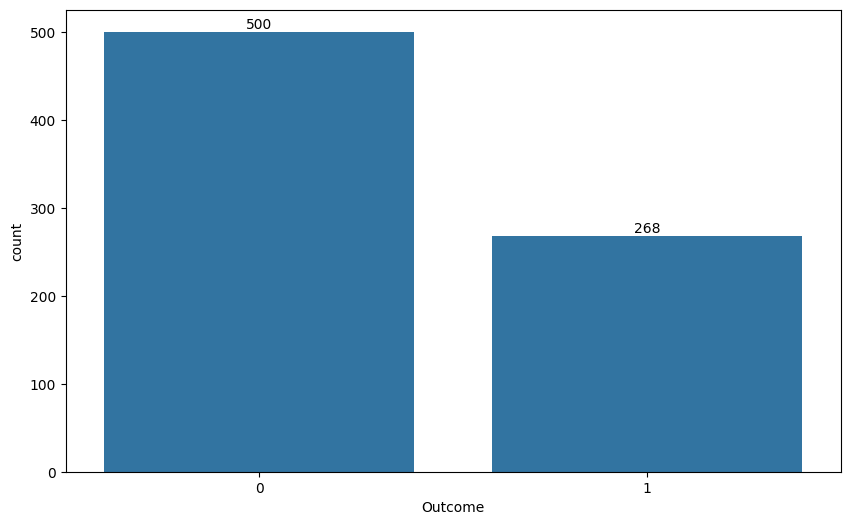

In [9]:
ax = sns.countplot(x='Outcome', data=df)
ax.bar_label(ax.containers[0]);

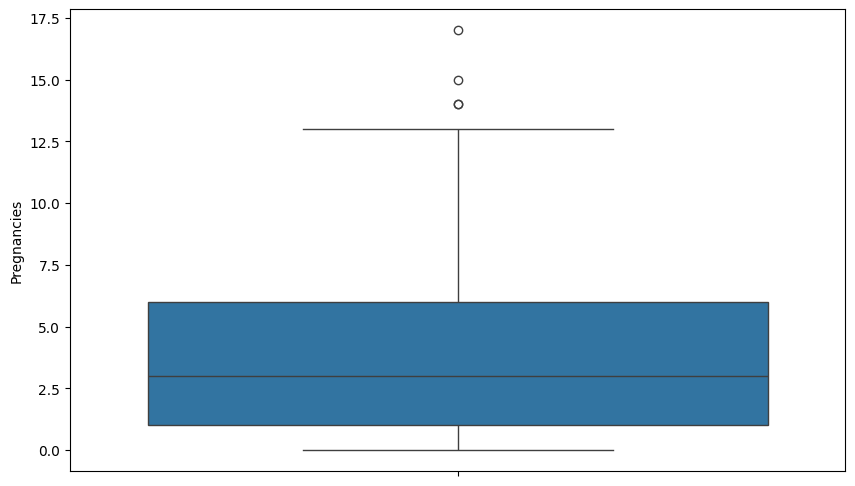

In [10]:
sns.boxplot(df.Pregnancies);

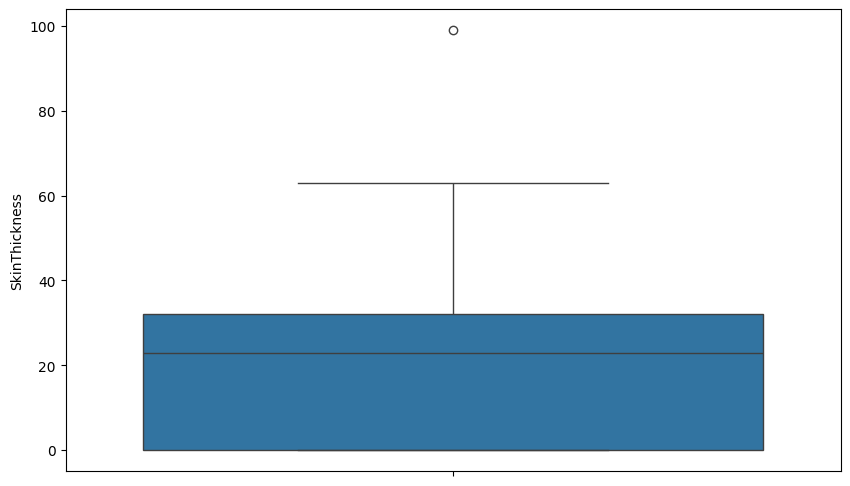

In [11]:
sns.boxplot(df.SkinThickness);

In [12]:
df = df[df.SkinThickness<70]

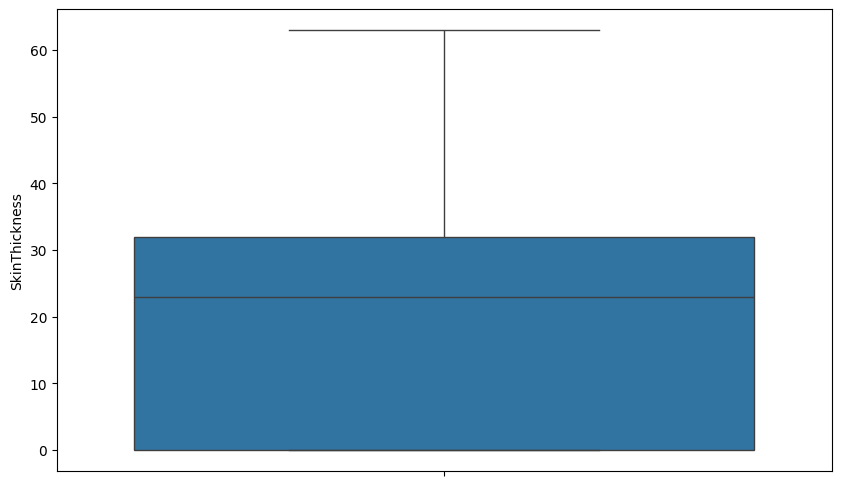

In [13]:
sns.boxplot(df.SkinThickness);

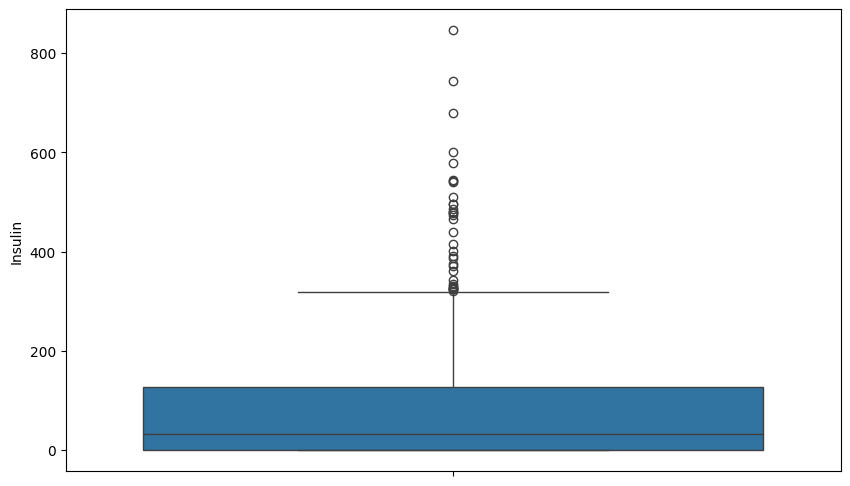

In [14]:
sns.boxplot(df.Insulin);

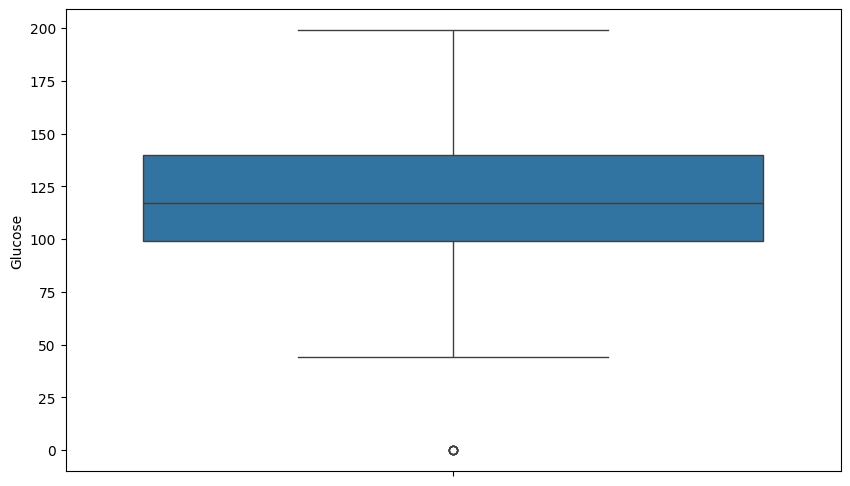

In [15]:
sns.boxplot(df.Glucose);

In [16]:
df = df[df.Glucose>0]

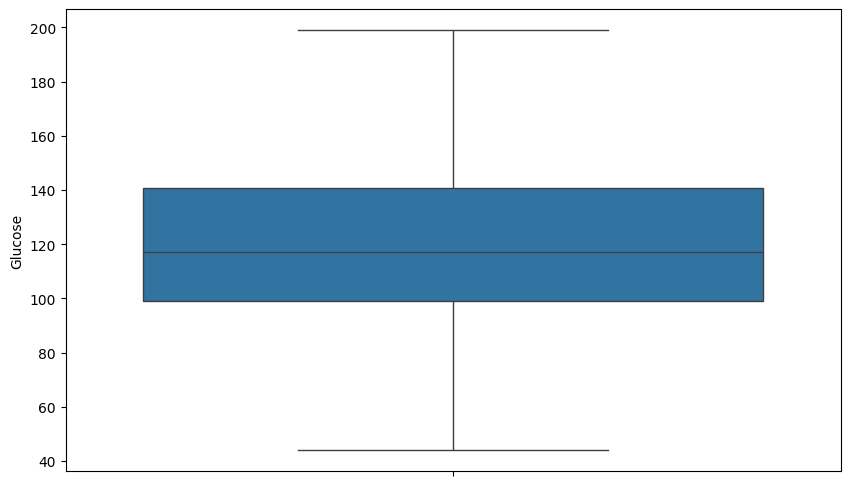

In [17]:
sns.boxplot(df.Glucose);

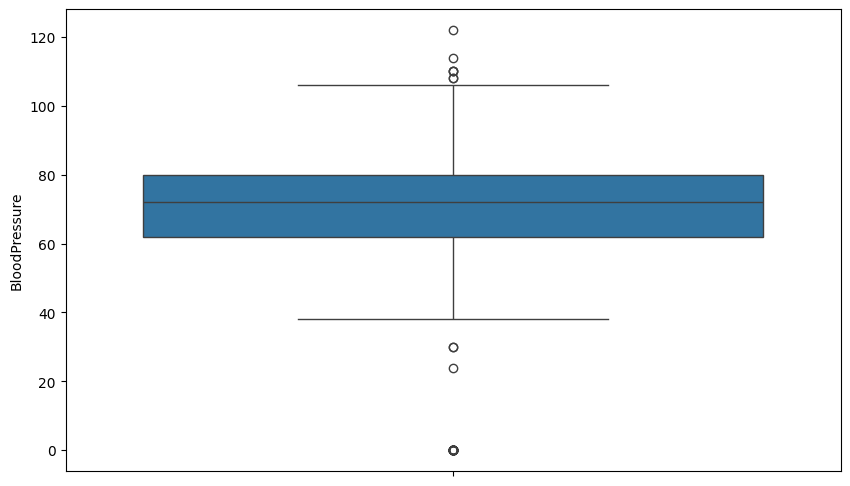

In [18]:
sns.boxplot(df.BloodPressure);

In [19]:
df = df[df.BloodPressure>35]

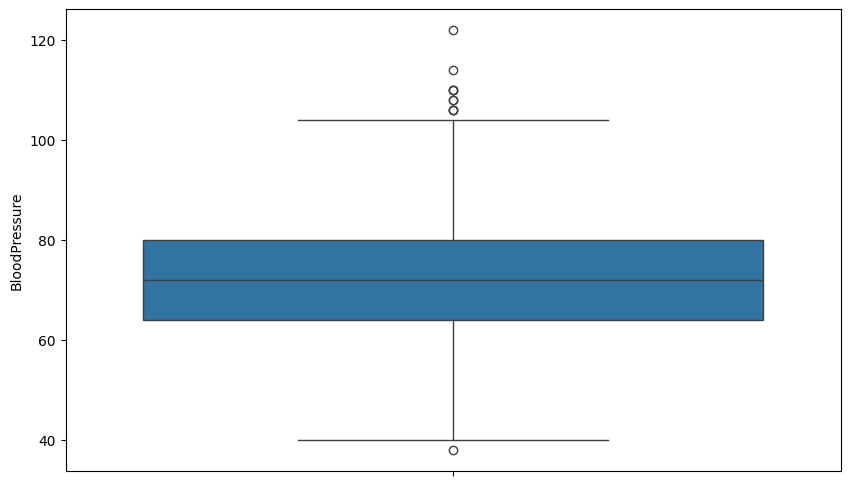

In [20]:
sns.boxplot(df.BloodPressure);

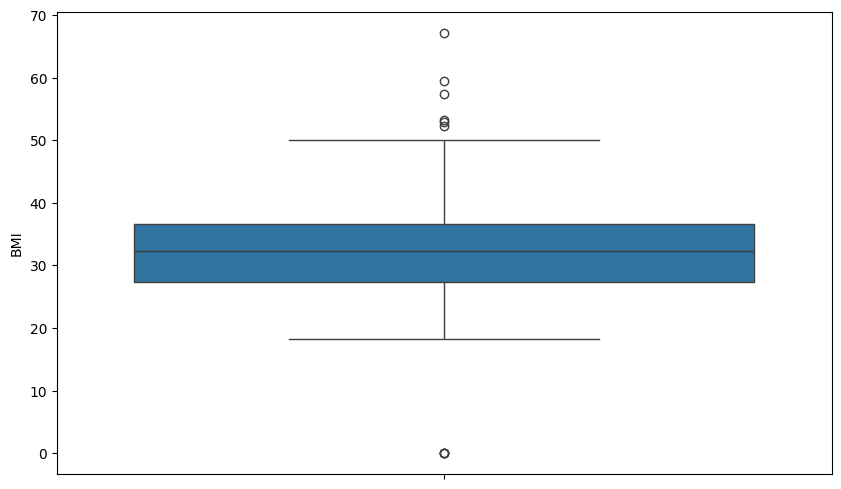

In [21]:
sns.boxplot(df.BMI);

In [22]:
df = df[df.BMI>0]

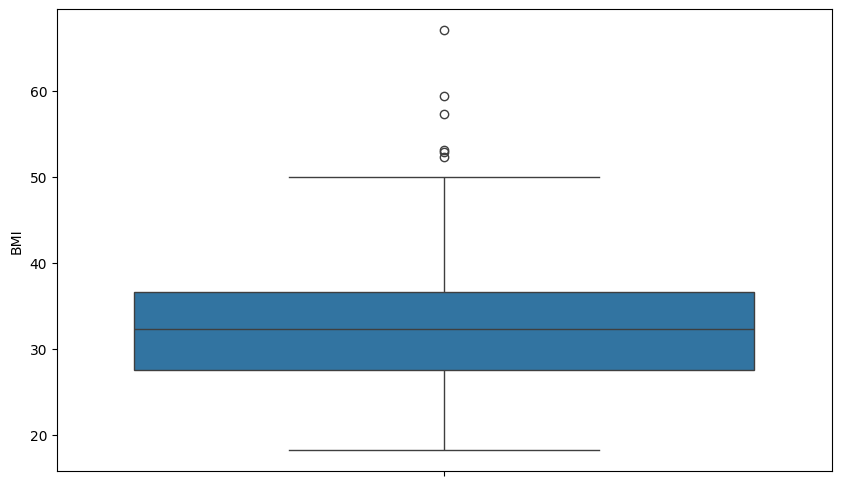

In [23]:
sns.boxplot(df.BMI);

In [24]:
df.shape  

(720, 9)

In [25]:
df.Outcome.value_counts() 

Outcome
0    473
1    247
Name: count, dtype: int64

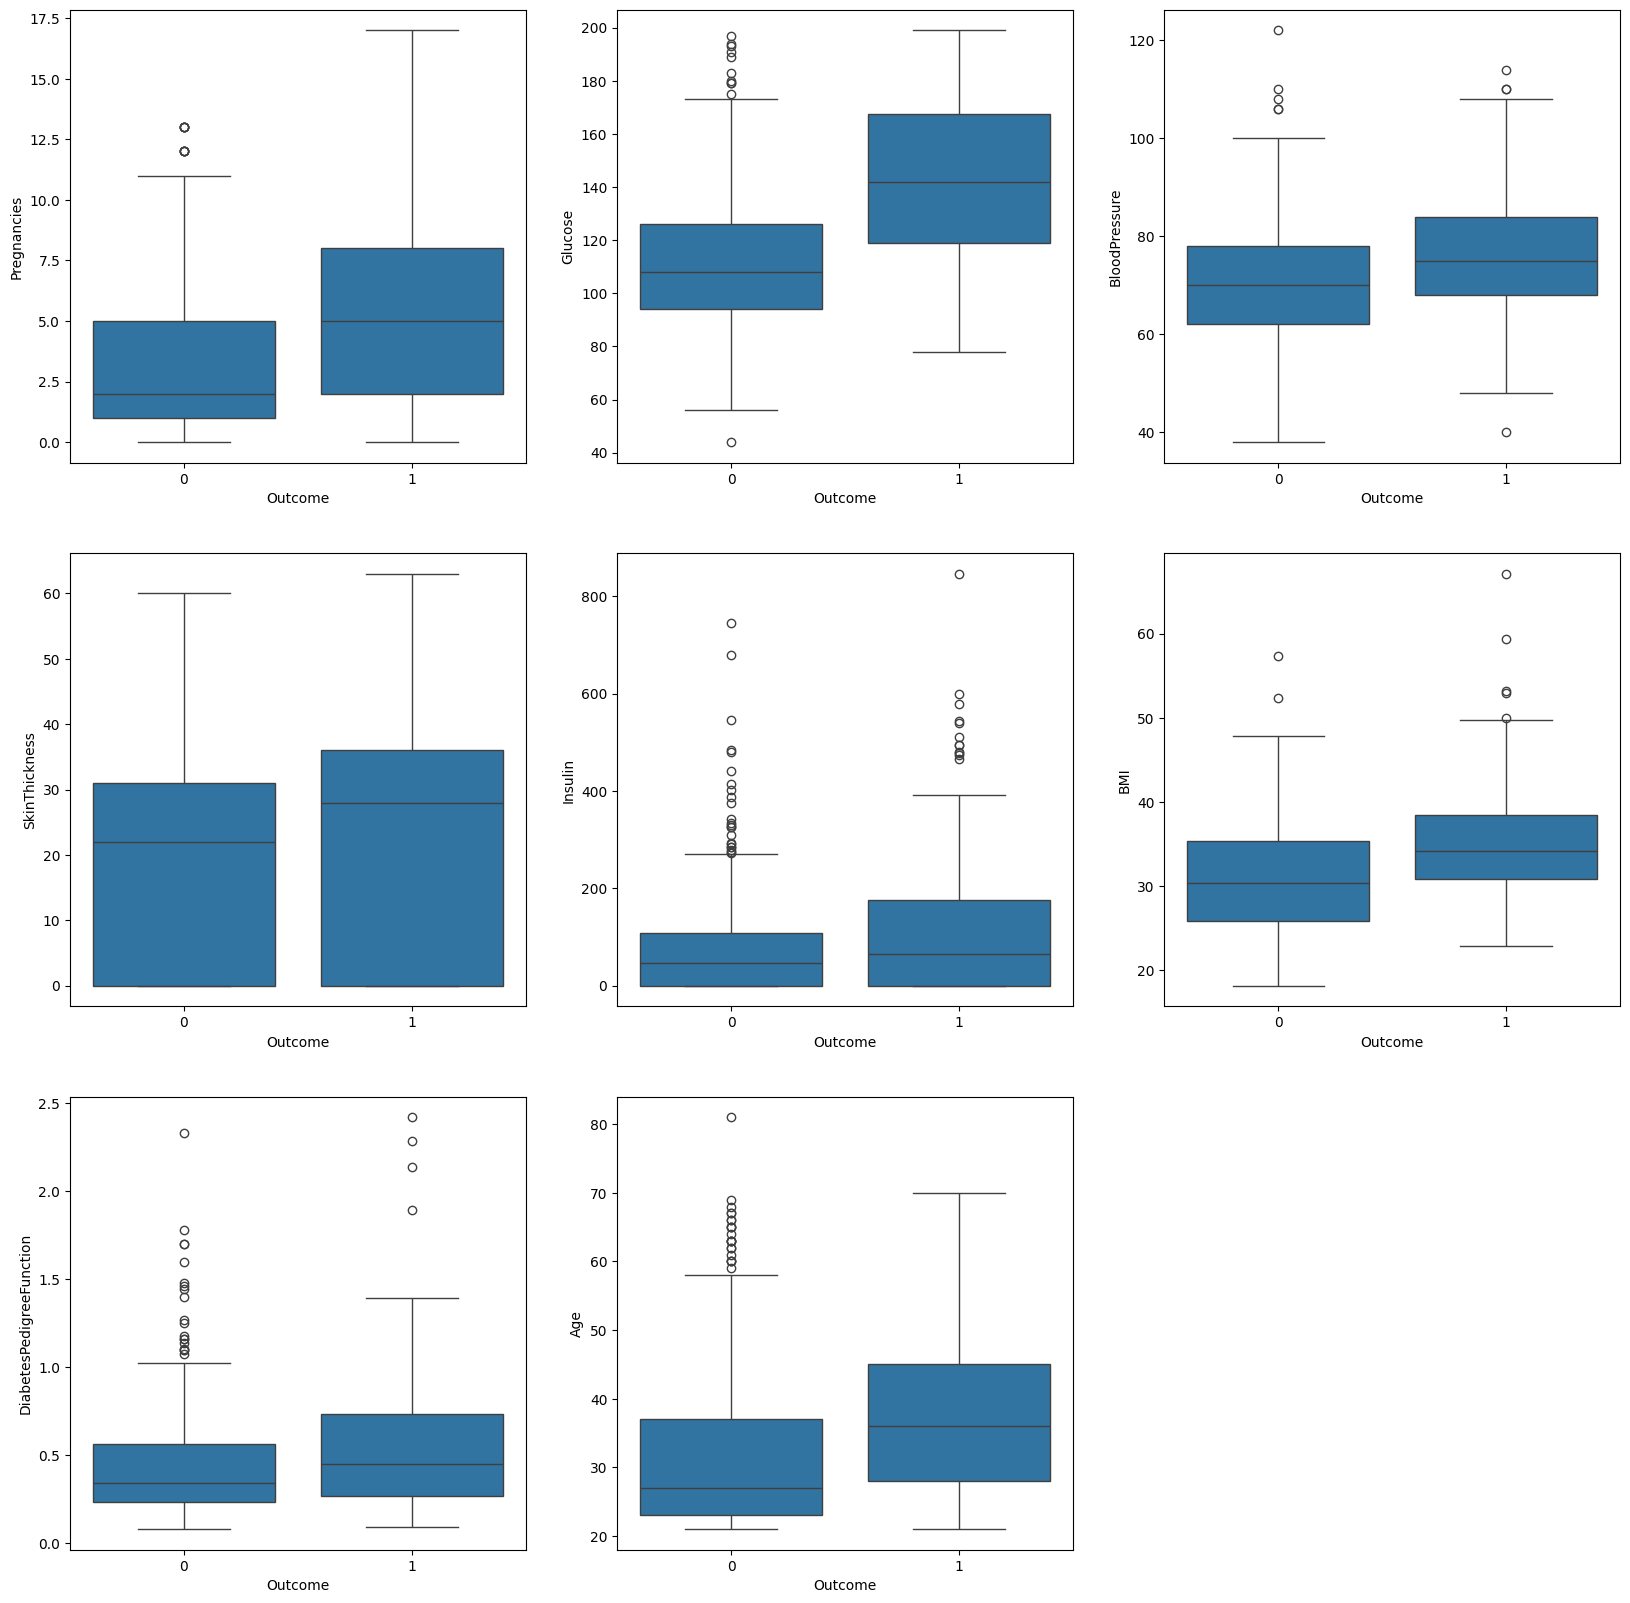

In [26]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

In [27]:
import plotly.express as px
plt.figure(figsize=(10,8))

fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

<Figure size 1000x800 with 0 Axes>

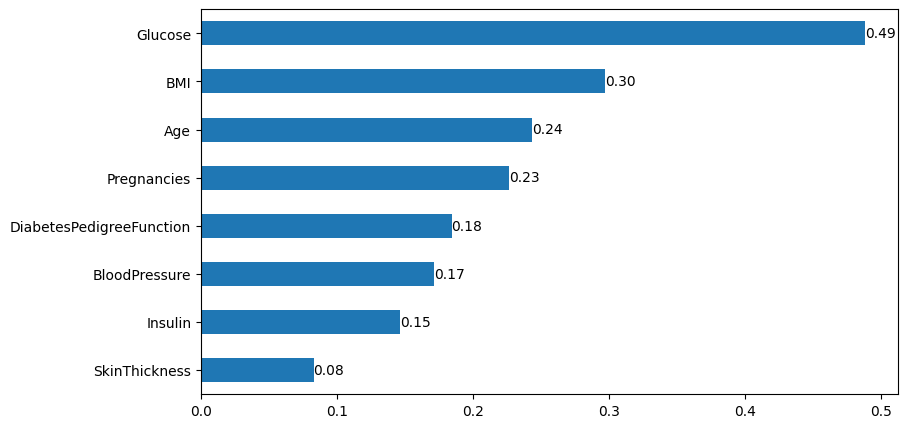

In [28]:
plt.figure(figsize=(9,5))
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

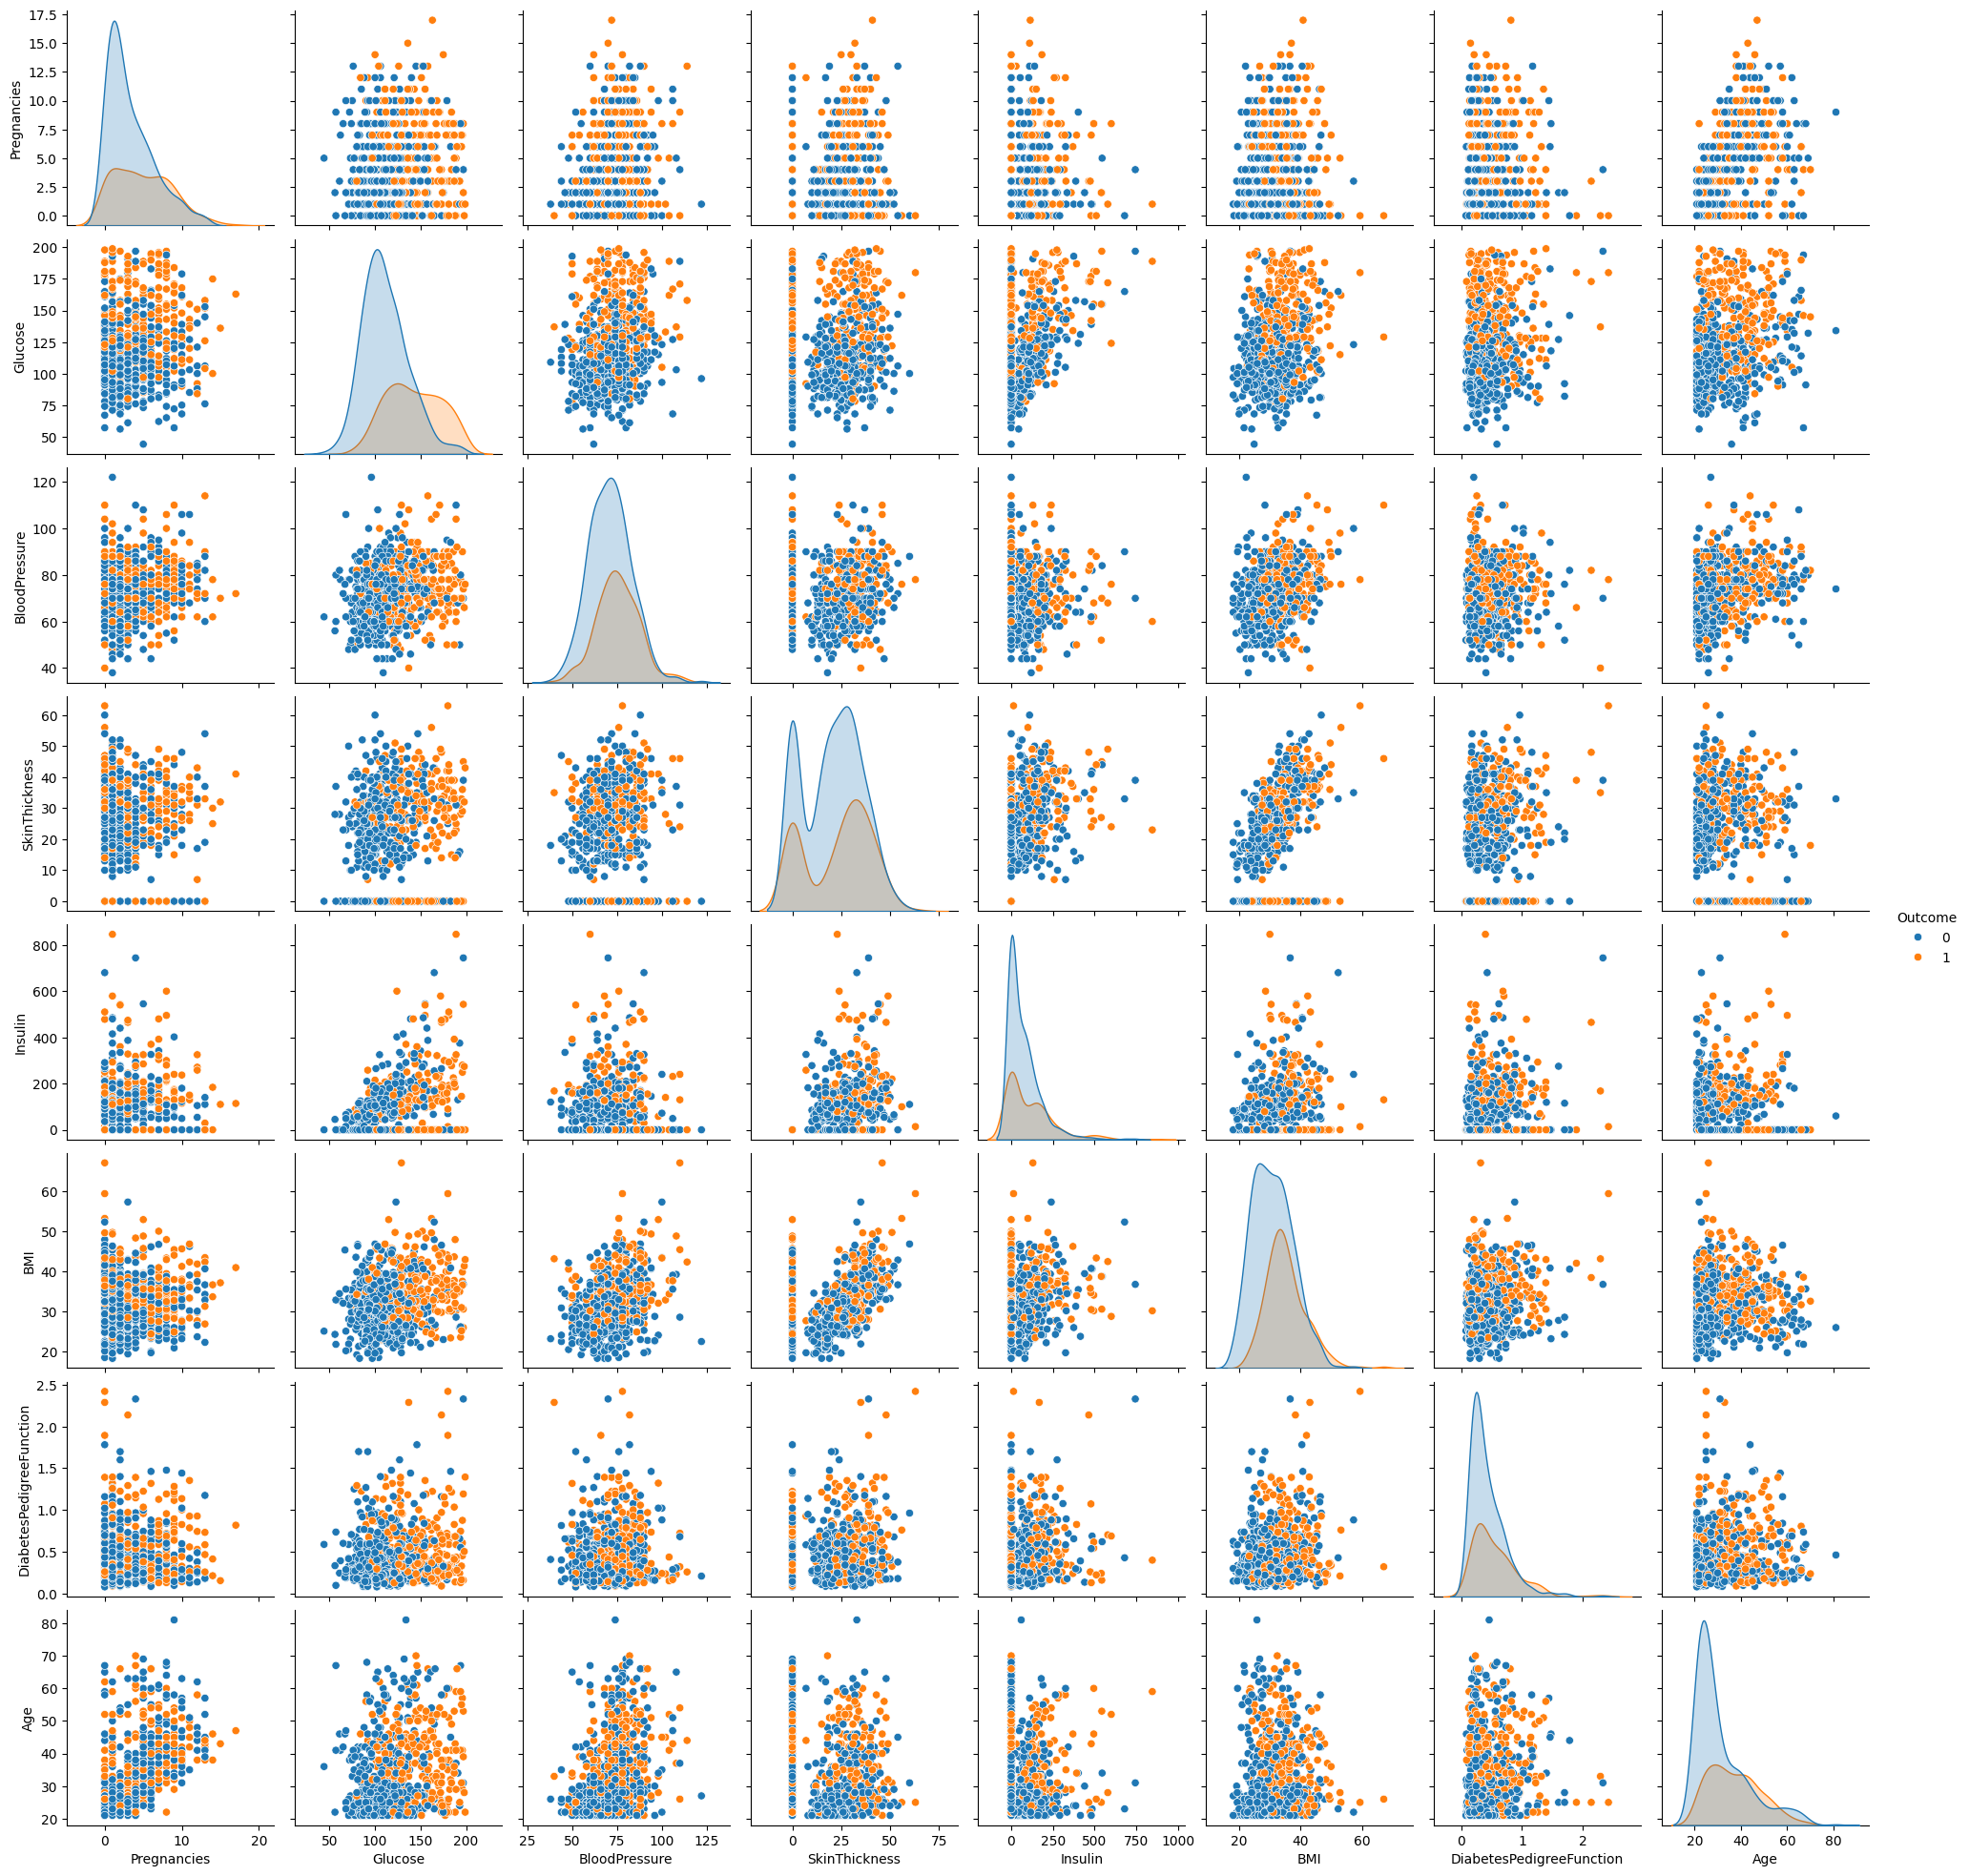

In [29]:
sns.pairplot(df, hue = "Outcome");

# One of the common challenges in classification problems is dealing with imbalanced datasets.
# In imbalanced datasets, the minority class naturally has fewer observations, 
# which often results in the model learning less effectively from the minority class compared 
# to the majority class. This can lead to lower scores (e.g., precision, recall, or F1) for the minority class.

# To improve or balance the scores of the minority class, we will discuss possible techniques below.

# IMPORTANT NOTE: In imbalanced datasets, the minority class does not always have poor scores.
# In some cases, the minority class may achieve high scores even with limited data.
# This can happen when the data is highly representative of the minority class,
# allowing the model to generalize well even with fewer observations.

# In such cases, there is no need to adjust or balance the scores of the minority class.

# Techniques to address imbalanced datasets include:
# 1. Resampling:
#    - Oversampling: Increasing the number of minority class observations (e.g., using SMOTE).
#    - Undersampling: Reducing the number of majority class observations.

# 2. Adjusting Class Weights:
#    - Using algorithms that support class weighting to penalize misclassification of the minority class.
#      For example, in scikit-learn, set `class_weight='balanced'`.

# 3. Choosing the Right Metrics:
#    - Focus on metrics like F1-Score, Precision-Recall AUC, or class-specific metrics instead of overall accuracy.

# 4. Data Augmentation:
#    - For specific data types (e.g., images), generate synthetic data to enhance the minority class.

# By analyzing the dataset and model performance, determine whether balancing techniques are necessary.


# Train | Test Split

In [30]:
X = df.drop("Outcome", axis=1)
y = df.Outcome

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# without stratify_y
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.20, random_state=42)
print(y_train_.value_counts(normalize=True))
print()
print(y_test_.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Outcome
0    0.680556
1    0.319444
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# When splitting classification datasets into train and test sets, if the dataset is imbalanced,we must use the `stratify=y` parameter.

# The `stratify` parameter ensures that the proportion of classes ( 0 and 1) is preserved in both the training and testing datasets.

# In imbalanced datasets, if this parameter is not used, the minority class may be unevenly distributed between 
# the train and test sets. This can lead to further imbalances and reduce the scores for the minority class.

# Using`stratify=y` for both balanced and imbalanced datasets to ensure consistent class distribution across train and test sets.

In [ ]:
# In the training and test datasets, stratify_y ensures that the proportion of each class in the target feature is maintained.
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.65625
1    0.34375
Name: proportion, dtype: float64

Outcome
0    0.659722
1    0.340278
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


# Modelling

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)
# Setting up pipeline.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [37]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[0.23367936, 0.76632064],
       [0.11960923, 0.88039077],
       [0.58160166, 0.41839834],
       [0.81462592, 0.18537408],
       [0.19181772, 0.80818228],
       [0.91051658, 0.08948342],
       [0.7639345 , 0.2360655 ],
       [0.13932957, 0.86067043],
       [0.97125901, 0.02874099],
       [0.88970007, 0.11029993],
       [0.71503222, 0.28496778],
       [0.75805504, 0.24194496],
       [0.82996045, 0.17003955],
       [0.81260234, 0.18739766],
       [0.0974634 , 0.9025366 ],
       [0.98344478, 0.01655522],
       [0.84875214, 0.15124786],
       [0.30126046, 0.69873954],
       [0.62398487, 0.37601513],
       [0.92736542, 0.07263458],
       [0.54071098, 0.45928902],
       [0.97778171, 0.02221829],
       [0.22511415, 0.77488585],
       [0.88700925, 0.11299075],
       [0.76148606, 0.23851394],
       [0.69324508, 0.30675492],
       [0.89994734, 0.10005266],
       [0.57209896, 0.42790104],
       [0.73984559, 0.26015441],
       [0.8399177 , 0.1600823 ],
       [0.

In [39]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1] # probability for class 1
test_data.sample(10)
# Adding 'pred' and 'pred_proba' features to the test dataset
# This allows us to observe and analyze how the model makes predictions

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
374,2,122,52,43,158,36.2,0.816,28,0,0,0.418398
433,2,139,75,0,0,25.6,0.167,29,0,0,0.198246
151,4,114,65,0,0,21.9,0.432,37,0,0,0.122954
93,4,134,72,0,0,23.8,0.277,60,1,0,0.241945
558,11,103,68,40,0,46.2,0.126,42,0,1,0.665518
716,3,173,78,39,185,33.8,0.970,31,1,1,0.774886
739,1,102,74,0,0,39.5,0.293,42,1,0,0.208336
542,10,90,85,32,0,34.9,0.825,56,1,0,0.381452
0,6,148,72,35,0,33.6,0.627,50,1,1,0.706151
70,2,100,66,20,90,32.9,0.867,28,1,0,0.185374


## Model Performance on Classification Tasks

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

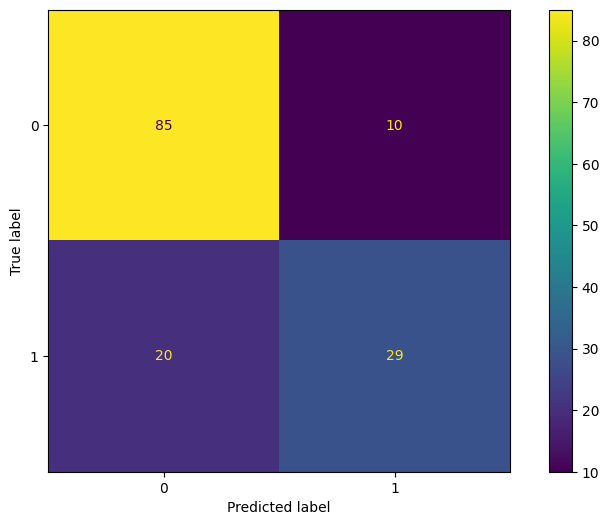

In [41]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)

In [42]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [43]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [45]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [46]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)
cv = StratifiedKFold(n_splits=10) # In each iteration, it performs a split of the train and test sets based on their proportions, 
                                    # ensuring consistent separation across all iterations.

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'],
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.030708,0.125359,0.600000,0.718310,0.450000,0.573034,0.514286,0.637500,0.706897,0.776062
2,0.108922,0.046363,0.642857,0.744526,0.450000,0.573034,0.529412,0.647619,0.724138,0.785714
3,0.052971,0.028090,0.923077,0.717557,0.600000,0.528090,0.727273,0.608414,0.844828,0.766409
4,0.014809,0.017223,0.857143,0.716418,0.600000,0.539326,0.705882,0.615385,0.827586,0.768340
5,0.022057,0.066717,0.705882,0.727941,0.600000,0.556180,0.648649,0.630573,0.775862,0.776062
6,0.028678,0.158518,0.647059,0.727941,0.550000,0.556180,0.594595,0.630573,0.741379,0.776062
7,0.072507,0.134240,0.714286,0.723881,0.526316,0.541899,0.606061,0.619808,0.771930,0.770713
8,0.046165,0.031779,0.647059,0.719424,0.578947,0.558659,0.611111,0.628931,0.754386,0.772640
9,0.012818,0.037456,0.750000,0.698529,0.600000,0.533708,0.666667,0.605096,0.789474,0.761079
10,0.020869,0.101433,0.625000,0.729927,0.500000,0.561798,0.555556,0.634921,0.719298,0.778420


In [52]:
df_scores.mean()[2:]

test_precision_0     0.787163
train_precision_0    0.791241
test_recall_0        0.880868
train_recall_0       0.888891
test_f1_0            0.831123
train_f1_0           0.837217
dtype: float64

## Cross Validate for 0 class

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)
scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

# make_scorer is used to target classes other than the default Class 1.
# By using the `pos_label=0` parameter from `f1_score` inside `make_scorer`, we can change the class value and apply operations for other classes.

# Metrics assigned to `make_scorer` must always be defined in a dictionary and assigned to a variable (e.g., `scoring`).
# Note that `pos_label` is not directly part of `make_scorer`; it comes from the scoring function (e.g., f1, recall).

In [ ]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores
# By assigning the previously defined `scoring` variable to the `scoring` parameter, we can obtain the metric scores for Class 0.

,fit_time,score_time,test_precision_0,train_precision_0,test_recall_0,train_recall_0,test_f1_0,train_f1_0
1,0.051872,0.149396,0.744186,0.797872,0.842105,0.882353,0.790123,0.837989
2,0.030543,0.012703,0.750000,0.800525,0.868421,0.897059,0.804878,0.846047
3,0.014988,0.019187,0.822222,0.782946,0.973684,0.891176,0.891566,0.833563
4,0.013615,0.036768,0.818182,0.786458,0.947368,0.888235,0.878049,0.834254
5,0.013040,0.011966,0.804878,0.793194,0.868421,0.891176,0.835443,0.839335
6,0.009082,0.015915,0.780488,0.793194,0.842105,0.891176,0.810127,0.839335
7,0.012965,0.014732,0.790698,0.787013,0.894737,0.891176,0.839506,0.835862
8,0.013557,0.014985,0.800000,0.792105,0.842105,0.885294,0.820513,0.836111
9,0.018917,0.022111,0.804878,0.783290,0.891892,0.879765,0.846154,0.828729
10,0.008820,0.011859,0.756098,0.795812,0.837838,0.891496,0.794872,0.840941


In [51]:
df_scores.mean()[2:]

test_precision_0     0.787163
train_precision_0    0.791241
test_recall_0        0.880868
train_recall_0       0.888891
test_f1_0            0.831123
train_f1_0           0.837217
dtype: float64

## GridSearchCV

[Logistic Regression Hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
pipe_model.get_params()

# If we are using a pipeline model within GridSearchCV, we can view the list of hyperparameters 
# belonging to the ML algorithm defined in the pipeline by using `get_params()`.

# The hyperparameters that will be written into the `param_grid` parameter of GridSearchCV 
# should be written as shown below.

# Note that within the pipeline, the name assigned to the ML model (e.g., "logistic") 
# is followed by two underscores (__), and then the actual hyperparameter name of the ML model is specified.


{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'deprecated',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [54]:
pipe_model.set_params(logistic__C = 0.5)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=0.5))])

[Threshold Optimization](https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7el)

In [55]:
from sklearn.model_selection import GridSearchCV

In [ ]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) # It is recommended to assign values for the coefficient using logspace.

class_weight= ["balanced", None] 

# In imbalanced datasets, we can use `class_weight="balanced"` to balance the classes.
# When the data is balanced, the model tries to increase the precision score for the minority class to improve its recall score.

# The "balanced" mode automatically adjusts the weights inversely proportional to the class frequencies in the input data 
# based on the values of `y`.

solver = ["lbfgs", "liblinear", "sag", "saga"] 

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = StratifiedKFold(n_splits = 10) #shuffle = True, random_state = 42

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",  # By default, it maximizes the score for Class 1.
# If you want to maximize the score for Class 0, use: 
# `f1_0 = make_scorer(f1_score, pos_label=0)`

                          n_jobs = -1,
                          return_train_score=True)

# Since GridSearchCV also performs cross-validation, we specify `return_train_score=True` to obtain both the validation and train set scores. 
# (Note: The scoring parameter only returns the metric score specified in the `scoring` argument.)


In [57]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

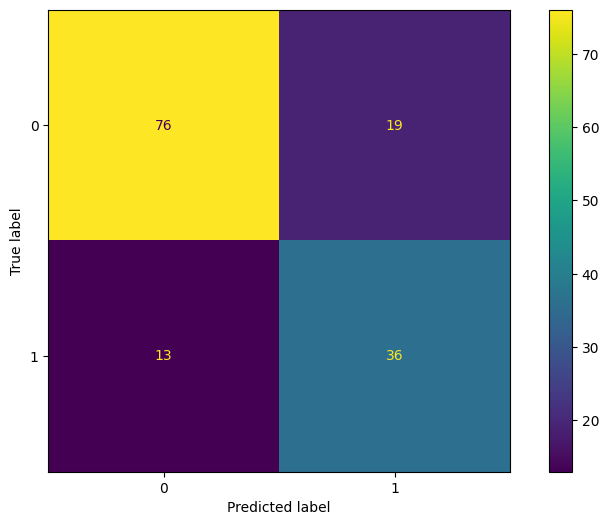

In [58]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)

In [59]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [63]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay,auc,  roc_auc_score, roc_curve, average_precision_score,precision_recall_curve

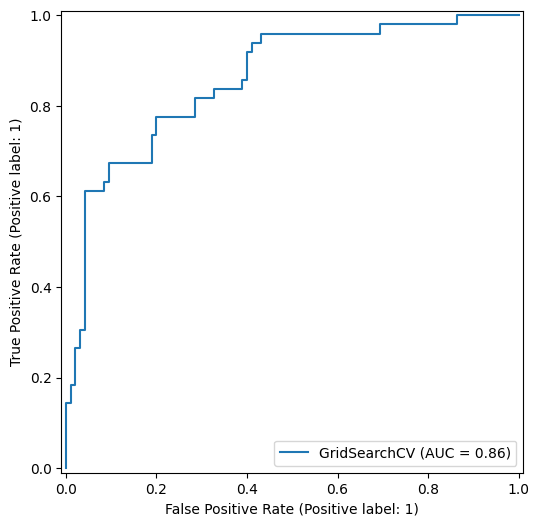

In [62]:
RocCurveDisplay.from_estimator(grid_model, X_test, y_test)

## Precision Recall Curve

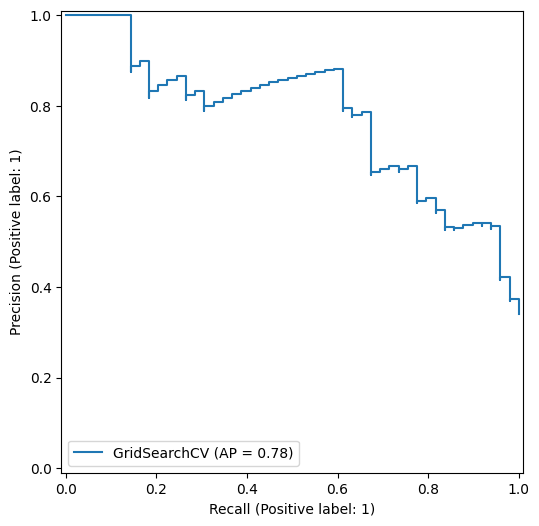

In [64]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

# Finding Best Thresholds

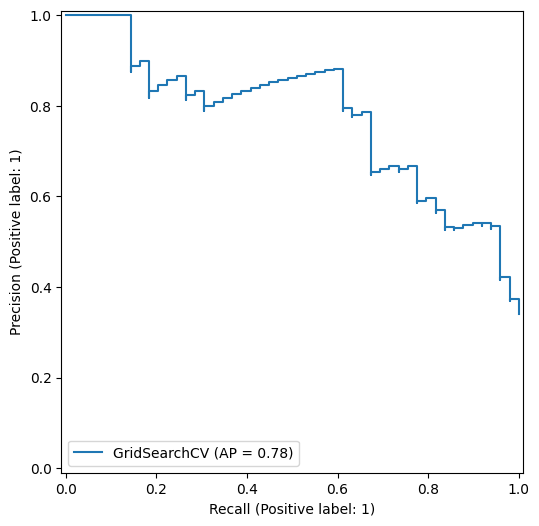

In [65]:
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

In [ ]:
y_train_pred_proba = grid_model.predict_proba(X_train) # Setting the threshold using the train data.

average_precision_score(y_train, y_train_pred_proba[:,1])

np.float64(0.7039681099671158)

In [67]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1] )

In [68]:
print("precision :", len(precisions))
print("recall    :", len(recalls))
print("threshold :", len(thresholds))

precision : 577
recall    : 577
threshold : 576


In [ ]:
dict = {"precisions":precisions[:-1], "recalls":recalls[:-1], "threshold":thresholds}
df_metric = pd.DataFrame(dict).sort_values(by = ["recalls", "precisions"], ascending=False)
df_metric
# Since the precision and recall values are one less than the thresholds, ignore the last values of precision and recall.

# Sort the `df_metric` scores first by recall and then by precision scores.

# This sorting helps us identify the highest precision score corresponding to the targeted recall score.
# Always remember that our goal is to achieve the maximum recall score along with the maximum precision score.


,precisions,recalls,threshold
115,0.429501,1.000000,0.224459
114,0.428571,1.000000,0.222725
113,0.427646,1.000000,0.221432
112,0.426724,1.000000,0.217897
111,0.425806,1.000000,0.216202
...,...,...,...
571,0.600000,0.015152,0.963332
573,0.666667,0.010101,0.969835
572,0.500000,0.010101,0.964119
575,1.000000,0.005051,0.988413


In [70]:
optimal_threshold = 0.224459

In [72]:
class_1_proba = grid_model.predict_proba(X_test)[:, 1]
class_1_proba

array([0.8611453 , 0.91894878, 0.5401603 , 0.32834942, 0.84586311,
       0.1902163 , 0.37230432, 0.89304779, 0.09179964, 0.2375841 ,
       0.42219422, 0.40048847, 0.32152333, 0.29623773, 0.9114718 ,
       0.04580491, 0.31484837, 0.77838197, 0.60683394, 0.17501991,
       0.59127537, 0.07183729, 0.85619503, 0.26773944, 0.35900683,
       0.42664284, 0.21360913, 0.5400696 , 0.47725185, 0.26627102,
       0.32224725, 0.47415484, 0.59969972, 0.29607444, 0.92993556,
       0.1640789 , 0.56706213, 0.37506342, 0.66446349, 0.17883618,
       0.22570751, 0.10909723, 0.11562863, 0.76814133, 0.45679052,
       0.48417171, 0.45125577, 0.84198651, 0.89861285, 0.48444072,
       0.31848648, 0.22798579, 0.4535917 , 0.06128558, 0.08594167,
       0.87896129, 0.65056236, 0.21427698, 0.72031094, 0.53911688,
       0.81870803, 0.62133343, 0.76003065, 0.91815215, 0.84382319,
       0.17312167, 0.33798375, 0.3685447 , 0.96338359, 0.10318433,
       0.50367532, 0.22027308, 0.76702601, 0.24150677, 0.65057

In [74]:
y_pred2 = [1 if i>= optimal_threshold else 0 for i in class_1_proba]


In [75]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[29 66]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.97      0.31      0.46        95
           1       0.42      0.98      0.59        49

    accuracy                           0.53       144
   macro avg       0.69      0.64      0.53       144
weighted avg       0.78      0.53      0.51       144



In [ ]:
class_1_proba_train = grid_model.predict_proba(X_train)[:,1]
y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba_train]
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))
# same calculation for train class_1_proba_train = grid_model.predict_proba(X_train)[:,1]
y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba_train]
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[115 263]
 [  1 197]]
              precision    recall  f1-score   support

           0       0.99      0.30      0.47       378
           1       0.43      0.99      0.60       198

    accuracy                           0.54       576
   macro avg       0.71      0.65      0.53       576
weighted avg       0.80      0.54      0.51       576

[[115 263]
 [  1 197]]
              precision    recall  f1-score   support

           0       0.99      0.30      0.47       378
           1       0.43      0.99      0.60       198

    accuracy                           0.54       576
   macro avg       0.71      0.65      0.53       576
weighted avg       0.80      0.54      0.51       576



In [ ]:
# Cross validation with optimal treshold

from sklearn.model_selection import StratifiedKFold

def CV(n, model, X, y, optimal_threshold=0.224456):
    skf = StratifiedKFold(n_splits = n) #shuffle = True, random_state = 42
    
    acc_scores = []
    test_pre_scores = []
    test_rec_scores = []
    test_f1_scores  = []
    
    train_pre_scores = []
    train_rec_scores = []
    train_f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        model = model
        model.fit(X_train, y_train)
        
        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred2 = [1 if i >= optimal_threshold else 0 for i in y_pred_proba]
        
        
        y_train_pred_proba = model.predict_proba(X_train)[:,1]
        y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in y_train_pred_proba]
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        
        test_pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        test_rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        test_f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
        
        train_pre_scores.append(precision_score(y_train, y_train_pred2, pos_label=1))
        train_rec_scores.append(recall_score(y_train, y_train_pred2, pos_label=1))
        train_f1_scores.append(f1_score(y_train, y_train_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>15,.2f}%  std {np.std(acc_scores)*100:.2f}%\n')
    
    print(f'Test_Precision-1 {np.mean(test_pre_scores)*100:>7,.2f}%  std {np.std(test_pre_scores)*100:.2f}%')
    print(f'Train_Precision-1 {np.mean(train_pre_scores)*100:>6,.2f}%  std {np.std(train_pre_scores)*100:.2f}%\n')
    
    print(f'Test_Recall-1 {np.mean(test_rec_scores)*100:>10,.2f}%  std {np.std(test_rec_scores)*100:.2f}%')
    print(f'Train_Recall-1 {np.mean(train_rec_scores)*100:>9,.2f}%  std {np.std(train_rec_scores)*100:.2f}%\n')
    
    print(f'Test_F1_score-1 {np.mean(test_f1_scores)*100:>8,.2f}%  std {np.std(test_f1_scores)*100:.2f}%')
    print(f'Train_F1_score-1 {np.mean(train_f1_scores)*100:>7,.2f}%  std {np.std(train_f1_scores)*100:.2f}%')
    
# We cannot use the classic Cross Validation function for the optimal threshold.
# Therefore, we use the manually written code here.
# The reason for checking the standard deviation of the scores along with the scores themselves is to evaluate how similar the scores are to each other.

In [79]:
model = LogisticRegression(C=0.1, class_weight='balanced',penalty='l1', solver='liblinear')
CV(10, model, X_train, y_train)

Accuracy           41.13%  std 2.89%

Test_Precision-1   36.52%  std 1.55%
Train_Precision-1  36.78%  std 0.49%

Test_Recall-1      96.47%  std 4.51%
Train_Recall-1     97.03%  std 0.26%

Test_F1_score-1    52.97%  std 2.12%
Train_F1_score-1   53.34%  std 0.53%


# Final Model and Model Deployment

In [ ]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=0.1, class_weight='balanced',
                                                         penalty='l1', solver='liblinear'))]
final_model = Pipeline(steps=operations)
final_model.fit(X, y)
# Building the final model using the best hyperparameters we found.


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [81]:
import pickle

In [82]:
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [83]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [ ]:
my_dict = {"Pregnancies": [3, 4, 5],
           "Glucose": [100, 110, 120],
           "BloodPressure": [75, 80, 70],
           "SkinThickness": [30, 25, 20],
           "Insulin": [80, 120, 130],
           "BMI": [25, 35, 30],
           "DiabetesPedigreeFunction": [0.4, 0.5, 0.6],
           "Age": [30, 40, 35]
          }
# Select 3 observations based on the minimum and maximum values.


In [85]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,100,75,30,80,25,0.4,30
1,4,110,80,25,120,35,0.5,40
2,5,120,70,20,130,30,0.6,35


In [86]:
sample_2 = sample.copy()

In [87]:
new_model.predict(sample)

array([0, 0, 0])

## New Predictions for optimal_threshols

In [88]:
def predict(model, X_test, optimal_threshold = 0.224456):
    predict_proba = model.predict_proba(X_test)
    prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba[:,1]]
    return prediction

In [90]:
y_pred = predict(final_model, sample_2)
y_pred

[0, 1, 1]

In [91]:
predictions = new_model.predict(sample)
predictions_proba = new_model.predict_proba(sample)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [ ]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.22"] = predictions2
sample
# We can observe the predictions below based on the default 0.5 threshold and the optimal threshold.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.22
0,3,100,75,30,80,25,0.4,30,0.173914,0,0
1,4,110,80,25,120,35,0.5,40,0.444470,0,1
2,5,120,70,20,130,30,0.6,35,0.462024,0,1
